In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
#Données
r1=[3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9,
 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2,
 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14,
 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9,
 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 7,
 5, 7, 6, 3, 7]

n1=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

r0=[0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2,
 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8,
 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5,
 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7,
 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1]

n0=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

year=[-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5,
 -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2,
 -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10]

In [141]:
#Fonctions utiles:
def sigm(x):
    return 1/(1+np.exp(-x))
def p0(mu):
    return sigm(mu)
def p1(mu,alpha,beta1,beta2,b,year):
    return sigm(mu+alpha+beta1*year+beta2*(year**2-22)+b)

n=10000 #Nombre d'itérations de l'échantilloneur
K=120 #Nombre de "strates"
std_dev=[0.1,0.01,0.001,0.1,100,100] #Variance des propositions

#Valeurs initiales:
alpha=-1.7
beta1=0
beta2=0
mu=[0]*K
b=[0]*K
sigma=0.1

#Echantilloneur:
def GibbsSampler(n,std_dev,alpha,beta1,beta2,sigma,mu,b):
    X=np.zeros((n+1,4)) #Alpha,Beta1,Beta2 et sigma
    Xmu=np.zeros((n+1,K))
    Xb=np.zeros((n+1,K))
    #Initialisatiion
    X[0]=[alpha,beta1,beta2,sigma]
    Xmu[0]=mu
    Xb[0]=b
    for j in range(n):
        #Mise à jour alpha
        X[j+1]=X[j]
        Xp=X[j+1][0]+std_dev[0]*np.random.normal() #propoisition alpha
        top0=-Xp**2/2000 #loi a priori
        top1=0 #vraisemblance
        for i in range(K):
            top1+=r1[i]*np.log(p1(Xmu[j+1][i],Xp,X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],Xp,X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
        top=top0+top1
        bottom0=-Xp**2/2000 #loi a priori
        bottom1=0 #vraisemblance
        for i in range(K):
            bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][0]=Xp
            
        #Mise à jour beta1
        Xp=X[j+1][1]+std_dev[1]*np.random.normal() #propoisition alpha
        top0=-Xp**2/2000 #loi a priori beta1
        top1=0 #vraisemblance beta1
        for i in range(K):
            top1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],Xp,X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],Xp,X[j+1][2],Xb[j+1][i],year[i]))
        top=top0+top1
        bottom0=-X[j+1][1]**2/2000 #loi a priori
        bottom1=0 #vraisemblance
        for i in range(K):
            bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][1]=Xp
            
        #Mise à jour beta2
        Xp=X[j+1][2]+std_dev[2]*np.random.normal() #propoisition alpha
        top0=-Xp**2/2000 #loi a priori beta2
        top1=0 #vraisemblance beta2
        for i in range(K):
            top1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],Xp,Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],Xp,Xb[j+1][i],year[i]))
        top=top0+top1
        bottom0=-X[j+1][2]**2/2000 #loi a priori
        bottom1=0 #vraisemblance
        for i in range(K):
            bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][2]=Xp
        
        #Mise à jour sigma
        Xp=X[j+1][3]+std_dev[3]*np.random.lognormal()
        top=-2.002*np.log(Xp)-0.001/Xp**2-np.sum(np.array(b)**2)/(2*Xp**2)
        bottom=-2.002*np.log(X[j+1][3])-0.001/Xp**2-np.sum(np.array(b)**2)/(2*X[j+1][3]**2)
        prob=np.exp(top-bottom)*Xp/X[j+1][3]
        if np.random.uniform()<prob:
            X[j+1][3]=Xp
        
        #Mise à jour mu
        Xmu[j+1]=Xmu[j]
        for k in range(K):
            Xp=Xmu[j+1][k]+std_dev[4]*np.random.normal() #propoisition alpha
            Xmup=Xmu[j+1]
            Xmup[k]=Xp
            top0=-Xp**2/2000 #loi a priori mu
            top1=0 #vraisemblance mu
            for i in range(K):
                top1+=r1[i]*np.log(p1(Xmup[i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmup[i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
                top1+=r0[i]*np.log(p0(Xmup[i]))+(n0[i]-r0[i])*np.log(1-p0(Xmup[i]))
            top=top0+top1
            bottom0=-mu[k]**2/2000 #loi a priori
            bottom1=0 #vraisemblance
            for i in range(K):
                bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
                bottom1+=r0[i]*np.log(p0(Xmu[j+1][i]))+(n0[i]-r0[i])*np.log(1-p0(Xmu[j+1][i]))
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xmu[j+1][k]=Xp
        
        #Mise à jour b
        Xb[j+1]=Xb[j]
        for k in range(K):
            Xp=Xb[j+1][k]+std_dev[5]*np.random.normal() #propoisition alpha
            Xbp=Xb[j+1]
            Xbp[k]=Xp
            top0=-Xp**2/(2*X[j+1][3]**2) #loi a priori b 
            top1=0 #vraisemblance b 
            for i in range(K):
                top1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xbp[i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xbp[i],year[i]))
            top=top0+top1
            bottom0=-Xb[j+1][k]**2/(2*X[j+1][3]**2) #loi a priori
            bottom1=0 #vraisemblance
            for i in range(K):
                bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xb[j+1][k]=Xp
    return X,Xmu,Xb
X,Xmu,Xb=GibbsSampler(100,std_dev,alpha,beta1,beta2,sigma,mu,b)

<ipython-input-141-fc2af2f41065>:97: RuntimeWarning: divide by zero encountered in log
  top1+=r1[i]*np.log(p1(Xmup[i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmup[i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
<ipython-input-141-fc2af2f41065>:98: RuntimeWarning: divide by zero encountered in log
  top1+=+r0[i]*np.log(p0(Xmup[i]))+(n0[i]-r0[i])*np.log(1-p0(Xmup[i]))
<ipython-input-141-fc2af2f41065>:103: RuntimeWarning: divide by zero encountered in log
  bottom1+=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
<ipython-input-141-fc2af2f41065>:104: RuntimeWarning: divide by zero encountered in log
  bottom1+=r0[i]*np.log(p0(Xmu[j+1][i]))+(n0[i]-r0[i])*np.log(1-p0(Xmu[j+1][i]))
<ipython-input-141-fc2af2f41065>:106: RuntimeWarning: invalid value encountered in double_scalars
  prob=np.exp(top-bottom)
<ipython-input-141-fc2af2f4

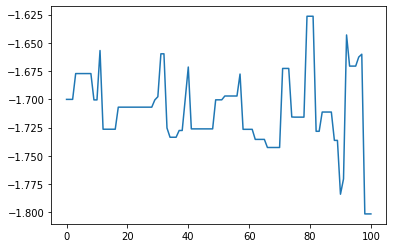

In [142]:
X=np.transpose(X)
plt.plot(X[0])

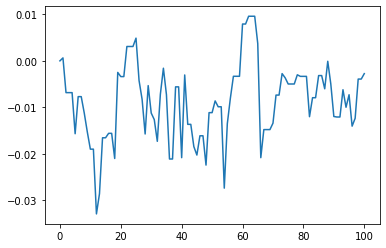

In [143]:
plt.plot(X[1])

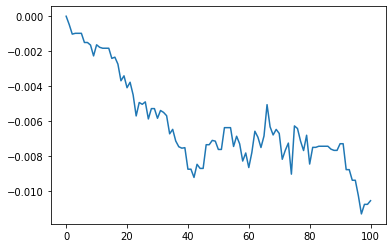

In [144]:
plt.plot(X[2])

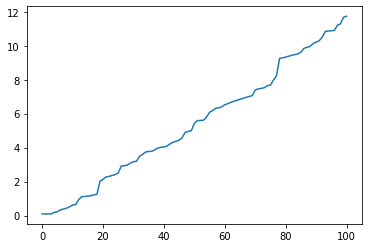

In [145]:
plt.plot(X[3])

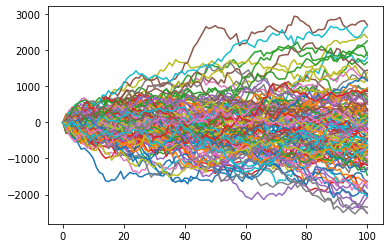

In [146]:
Xb=Xb.transpose()
for i in range(120):
    plt.plot(Xb[i])

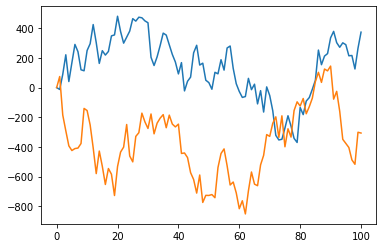

In [150]:
plt.plot(Xb[3])
plt.plot(Xmu[3])

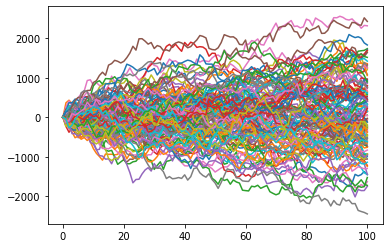

In [148]:
Xmu=Xmu.transpose()
for i in range(120):
    plt.plot(Xmu[i])

In [153]:
for i in range(120):
    print("sigm",sigm(Xmu[i][-1]))
    print(r0[i],n0[i])

sigm 1.0
0 28
sigm 1.0
2 21
sigm 1.0
2 32
sigm 6.645742036691804e-134
1 35
sigm 1.0
2 35
sigm 1.8974182623870773e-29
0 38
sigm 0.0
1 30
sigm 1.0
1 43
sigm 5.279087792717001e-163
1 49
sigm 6.697692429478784e-88
2 53
sigm 0.0
4 31
sigm 4.908882476154225e-16
4 35
sigm 1.0
2 46
sigm 0.0
1 53
sigm 0.0
7 61
sigm 0.0
4 40
sigm 1.0
3 29
sigm 1.0
5 44
sigm 1.0
3 52
sigm 1.0
2 55
sigm 0.0
4 61
sigm 0.0
1 31
sigm 0.0
4 48
sigm 1.0
5 44
sigm 1.349532693930262e-154
2 42
sigm 4.132049101755839e-109
7 53
sigm 1.0
5 56
sigm 0.0
8 71
sigm 1.0
2 43
sigm 0.0
3 43
sigm 1.0
5 43
sigm 1.0
4 40
sigm 1.0
1 44
sigm 1.0
6 70
sigm 0.0
5 75
sigm 1.0
11 71
sigm 4.9392720408802715e-26
5 37
sigm 8.616647161064736e-207
2 31
sigm 1.0
5 42
sigm 1.0
8 46
sigm 1.0
5 47
sigm 1.0
6 55
sigm 1.0
6 63
sigm 2.902636211365281e-195
10 91
sigm 1.5177915606872546e-160
7 43
sigm 1.115778361097212e-52
5 39
sigm 3.7524084194461184e-144
5 35
sigm 1.0
2 32
sigm 1.0
8 53
sigm 1.0
1 49
sigm 1.0
13 75
sigm 1.0
9 64
sigm 0.0
11 69
sigm 1.0

<ipython-input-141-fc2af2f41065>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
